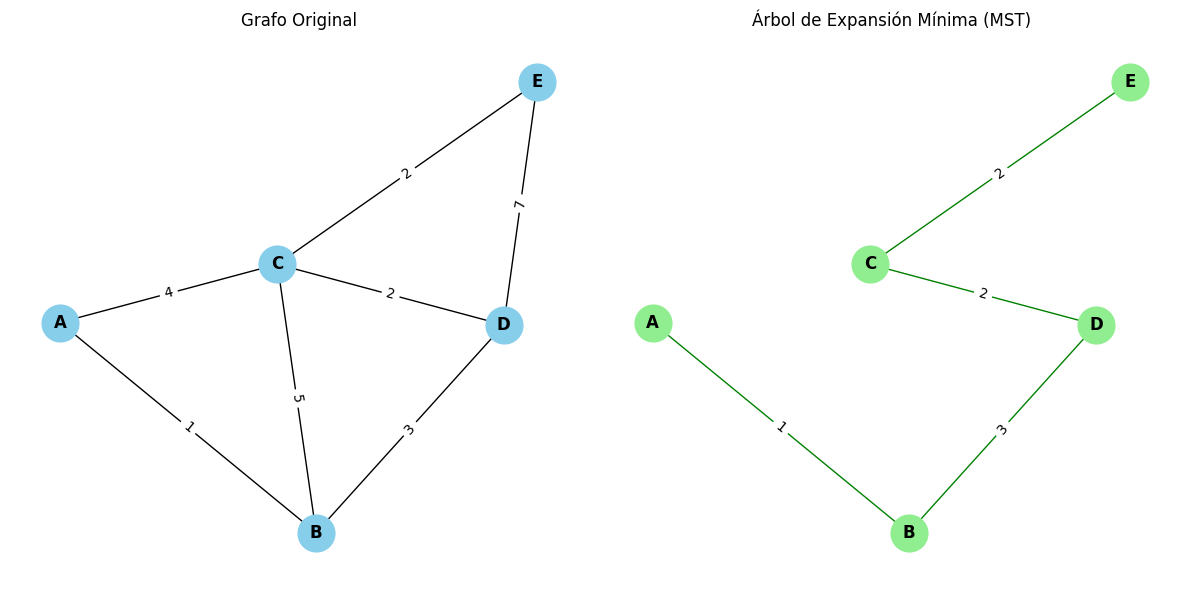

Árbol de Expansión Mínima (Prim):
A - B (peso: 1)
B - D (peso: 3)
D - C (peso: 2)
C - E (peso: 2)


In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def prim(graph, start):
    mst = []
    visited = set()
    min_edges = [(0, start, None)]  # (costo, nodo, desde)

    while min_edges:
        cost, node, from_node = heapq.heappop(min_edges)
        if node not in visited:
            visited.add(node)
            if from_node:
                mst.append((from_node, node, cost))
            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(min_edges, (weight, neighbor, node))
    return mst

# Grafo como lista de adyacencia
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 5), ('D', 3)],
    'C': [('A', 4), ('B', 5), ('D', 2), ('E', 2)],
    'D': [('B', 3), ('C', 2), ('E', 7)],
    'E': [('C', 2), ('D', 7)],
}

# Ejecutar Prim
mst = prim(graph, 'A')

# Crear el grafo completo y el MST para graficar
G = nx.Graph()
for node in graph:
    for neighbor, weight in graph[node]:
        G.add_edge(node, neighbor, weight=weight)

MST = nx.Graph()
for u, v, weight in mst:
    MST.add_edge(u, v, weight=weight)

# Dibujar el grafo completo y el MST
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 6))

# Grafo original
plt.subplot(121)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo Original')

# Árbol de Expansión Mínima (MST)
plt.subplot(122)
nx.draw(MST, pos, with_labels=True, node_color='lightgreen', node_size=700, font_weight='bold', edge_color='green')
edge_labels_mst = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(MST, pos, edge_labels=edge_labels_mst)
plt.title('Árbol de Expansión Mínima (MST)')

plt.tight_layout()
plt.show()

# Mostrar el MST en texto
print("Árbol de Expansión Mínima (Prim):")
for edge in mst:
    print(f"{edge[0]} - {edge[1]} (peso: {edge[2]})")